In [1]:
%load_ext lab_black

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("seaborn")

### 1. Elección del dataset

Para realizar este trabajo utilizaremos el dataset de comidas de [McDonald's](https://www.kaggle.com/datasets/mcdonalds/nutrition-facts) provisto por Kaggle.

In [2]:
file_path = "/tf/notebooks/CEIA-analisis_de_datos/TP_final/dataset/menu.csv"

df = pd.read_csv(file_path)

### 2. Análisis exploratiorio inicial

- Visualizar las primeras filas

In [3]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


- Realizar un resumen de 5 números

In [4]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si 
es informativa para un problema de clasificación (por ejemplo si se trata de un código, como 
una matrícula, o un nombre propio)

  | Nombre                        | Tipo            | Informativa |
  | :---------------------------- | :-------------: |  :--------: |
  | Category                      | Categórica      | Si          |
  | Item                          | Categórica con relación ordinal entre algunas clases (por ej. *small*, *medium* y *large*) | Si          |
  | Serving Size                  | Numérica        | Si          |
  | Calories                      | Numérica        | Si          |
  | Calories from Fat             | Numérica        | Si          |
  | Total Fat                     | Numérica        | Si          |
  | Total Fat (% Daily Value)     | Numérica        | Si          |
  | Saturated Fat                 | Numérica        | Si          |
  | Saturated Fat (% Daily Value) | Numérica        | Si          |
  | Trans Fat	                    | Numérica        | Si          |
  | Cholesterol                   | Numérica        | Si          |
  | Cholesterol (% Daily Value)   | Numérica        | Si          |
  | Sodium                        | Numérica        | Si          |
  | Sodium (% Daily Value)        | Numérica        | Si          |
  | Carbohydrates                 | Numérica        | Si          |
  | Carbohydrates (% Daily Value) | Numérica        | Si          |
  | Dietary Fiber                 | Numérica        | Si          |
  | Dietary Fiber (% Daily Value) | Numérica        | Si          |
  | Sugars                        | Numérica        | Si          |
  | Protein                       | Numérica        | Si          |
  | Vitamin A (% Daily Value)     | Numérica        | Si          |
  | Vitamin C (% Daily Value)     | Numérica        | Si          |
  | Calcium (% Daily Value)       | Numérica        | Si          |
  | Iron (% Daily Value)          | Numérica        | Si          |

  A priori, todas las columnas, por si solas, parecen ser informativas para un problema de clasificación. Sin embargo, todas las variables que se repiten con *(& Daily Fat Value)* presentan información duplicada ya que el valor normal y el valor % solo difieren en la escala. Incluso, debido a que los porcentajes están redondeados a números enteros se podría perder información ya que dos valores cercanos se podrían mapear al mismo porcentaje. Por esta razón se deciden eliminar las variables que cuentan con su valor normal y en porcentaje.

In [5]:
df.drop(
    columns=[
        "Total Fat (% Daily Value)",
        "Saturated Fat (% Daily Value)",
        "Cholesterol (% Daily Value)",
        "Sodium (% Daily Value)",
        "Carbohydrates (% Daily Value)",
        "Dietary Fiber (% Daily Value)",
    ],
    inplace=True,
)
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


- Identificar las variables de entrada y de salida del problema.

En este caso se elije *Calories* como variable de salida por lo tanto será un problema de regresión. Todas las demas features se pueden usar como variables entrada.

- Variables de entrada: 
  - Realizar los siguientes análisis por tipo de variable: 
    - Numéricas: Obtener conclusiones acerca de la distribución de los datos. 
    - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc. 
    - Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver? 

  Para analizar la variable *Serving Size* debemos preprocesar los datos ya que la columna contiene los valores en onzas y gramos, para este caso nos quedamos con los valores en gramos.

In [6]:
# serving_size_g = (
#     df["Serving Size"]
#     .str.extract(r"\((.*)\)", expand=False)
#     .str.extract(r"(\d+)", expand=False)
# )

# Ver que hacer con los NaN
serving_size_g = (
    (
        df["Serving Size"]
        .str.extract(r"\((.*)\)", expand=False)
        .str.extract(r"(\d+)", expand=False)
    )
    .astype("float")
    .astype("Int64")
)

df.insert(2, "Serving Size (g)", serving_size_g)
df.drop(columns=["Serving Size"], inplace=True)
df.head()

,Category,Item,Serving Size (g),Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136,300,120,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135,250,70,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111,370,200,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161,450,250,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161,400,210,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


In [7]:
# df.plot.hist(subplots=True, sharex=False, layout=(6, 3), figsize=(16, 20))


# df_numeric = df.drop(columns=["Category", "Item"])

# f, axes = plt.subplots(4, 4, figsize=(20, 20))
# for ax, feature in zip(axes.flat, df_numeric.columns):
#     sns.distplot(df_numeric[feature], ax=ax)

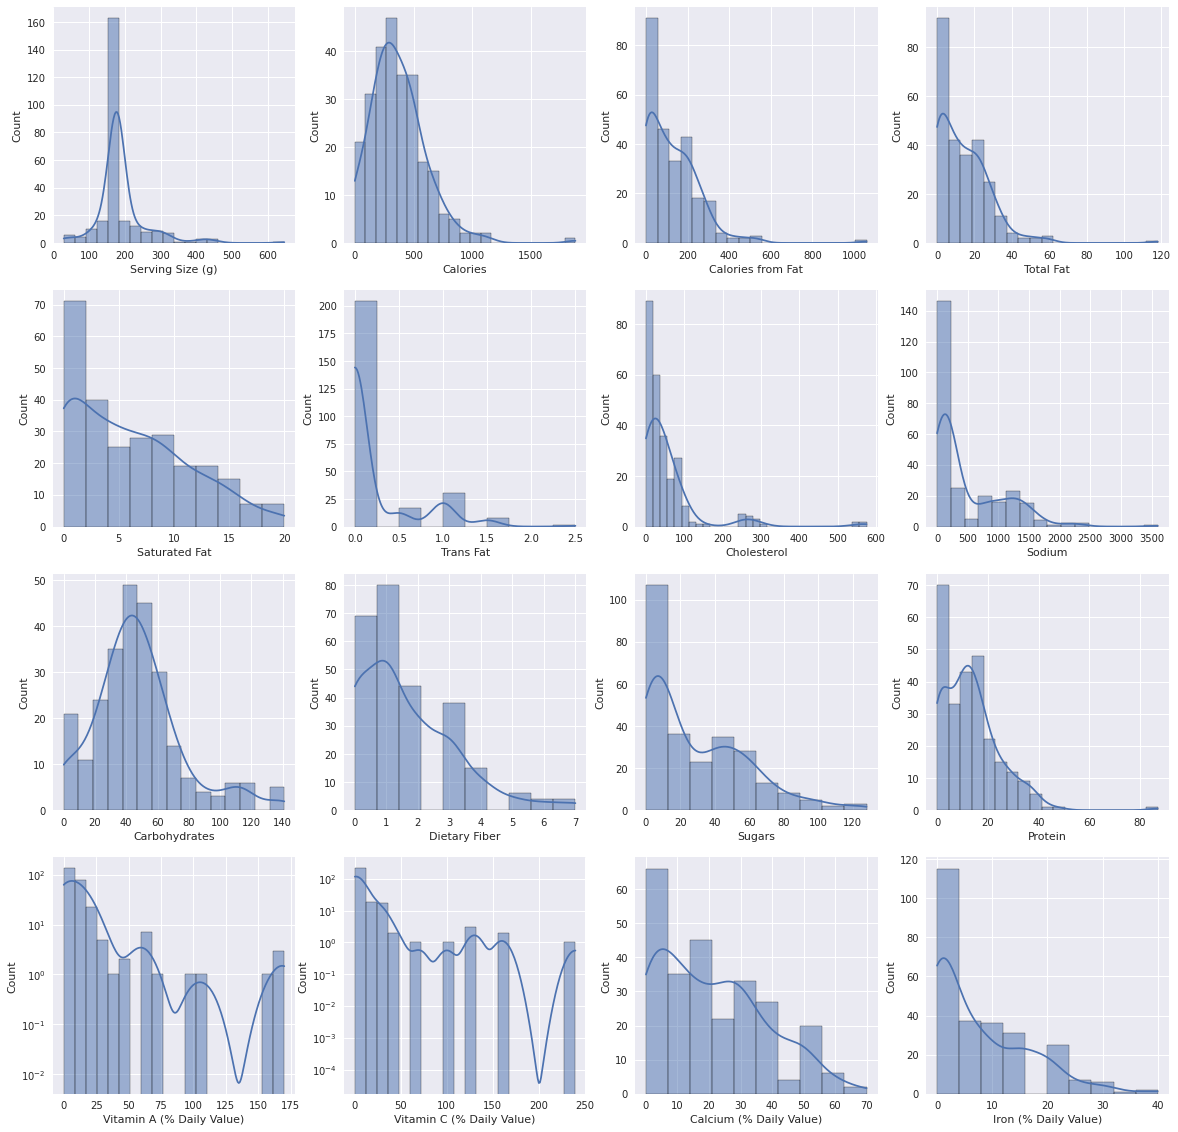

In [8]:
df_numeric = df.drop(columns=["Category", "Item"])

df_numeric.fillna(method="pad", inplace=True)  # Hacer esto en otro lado

f, axes = plt.subplots(4, 4, figsize=(20, 20))
for ax, feature in zip(axes.flat, df_numeric.columns):
    optional_args = {}
    if feature == "Serving Size (g)":
        optional_args = {"bins": 20}
    if feature == "Vitamin A (% Daily Value)" or feature == "Vitamin C (% Daily Value)":
        optional_args = {"log_scale": (False, True), "bins": 20}
    sns.histplot(df_numeric[feature], ax=ax, kde=True, **optional_args)

In [9]:
df.isnull().sum()

Category                       0
Item                           0
Serving Size (g)             139
Calories                       0
Calories from Fat              0
Total Fat                      0
Saturated Fat                  0
Trans Fat                      0
Cholesterol                    0
Sodium                         0
Carbohydrates                  0
Dietary Fiber                  0
Sugars                         0
Protein                        0
Vitamin A (% Daily Value)      0
Vitamin C (% Daily Value)      0
Calcium (% Daily Value)        0
Iron (% Daily Value)           0
dtype: int64

In [10]:
df.fillna(method="pad", inplace=True)
df.isnull().sum()

Category                     0
Item                         0
Serving Size (g)             0
Calories                     0
Calories from Fat            0
Total Fat                    0
Saturated Fat                0
Trans Fat                    0
Cholesterol                  0
Sodium                       0
Carbohydrates                0
Dietary Fiber                0
Sugars                       0
Protein                      0
Vitamin A (% Daily Value)    0
Vitamin C (% Daily Value)    0
Calcium (% Daily Value)      0
Iron (% Daily Value)         0
dtype: int64